In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam

In [2]:
# Define data generators for training and validation sets
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('data/train', target_size=(299, 299), batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory('data/test', target_size=(299, 299), batch_size=32, class_mode='categorical')

Found 1951 images belonging to 4 classes.
Found 18 images belonging to 4 classes.


In [3]:
# Load the pre-trained InceptionV3 model and remove the top layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

Metal device set to: Apple M2


In [5]:
# Add new top layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

In [6]:
# Create the final model by combining base and top layers
model = Model(inputs=base_model.input, outputs=predictions)

In [7]:
# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

/Users/aditya/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [18]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 35, 35, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 17, 17, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 17, 17, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 17, 17, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 17, 17, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 17, 17, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 17, 17, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 8, 8, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 8, 8, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 8, 8, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [8]:
# Train the model
history = model.fit(train_generator, epochs=10, steps_per_epoch=61, validation_data=val_generator, validation_steps=1)

Epoch 1/10


2023-04-26 00:53:41.118178: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


61/61 [==============================] - 25s 343ms/step - loss: 0.8117 - accuracy: 0.6930 - val_loss: 0.5564 - val_accuracy: 0.8333
Epoch 2/10
61/61 [==============================] - 19s 311ms/step - loss: 0.4182 - accuracy: 0.8631 - val_loss: 0.4225 - val_accuracy: 0.8889
Epoch 3/10
61/61 [==============================] - 20s 326ms/step - loss: 0.3048 - accuracy: 0.9113 - val_loss: 0.4170 - val_accuracy: 0.8333
Epoch 4/10
61/61 [==============================] - 21s 339ms/step - loss: 0.2542 - accuracy: 0.9175 - val_loss: 0.3287 - val_accuracy: 0.9444
Epoch 5/10
61/61 [==============================] - 22s 353ms/step - loss: 0.2237 - accuracy: 0.9288 - val_loss: 0.3603 - val_accuracy: 0.8333
Epoch 6/10
61/61 [==============================] - 23s 363ms/step - loss: 0.2025 - accuracy: 0.9395 - val_loss: 0.2397 - val_accuracy: 0.8889
Epoch 7/10
61/61 [==============================] - 26s 412ms/step - loss: 0.1717 - accuracy: 0.9523 - val_loss: 0.2505 - val_accuracy: 0.8889
Epoch 8/10

In [9]:
# Save the trained model
model.save('plant_disease_detection_inceptionv3.h5')

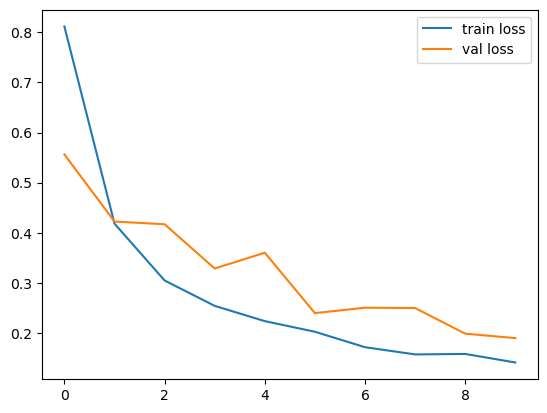

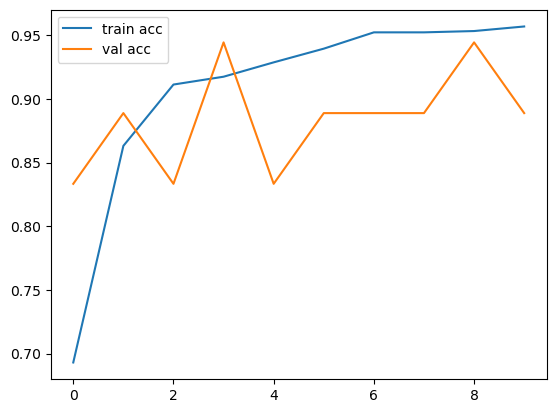

<Figure size 640x480 with 0 Axes>

In [19]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [12]:
# Evaluate the model on the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('data/test', target_size=(299, 299), batch_size=1, class_mode='categorical', shuffle=False)
loss, accuracy = model.evaluate(test_generator)
print('Test accuracy:', accuracy)

Found 18 images belonging to 4 classes.
18/18 [==============================] - 2s 47ms/step - loss: 0.1898 - accuracy: 0.8889
Test accuracy: 0.8888888955116272


In [14]:
# Load the saved model
from keras.models import load_model
model = load_model('plant_disease_detection_inceptionv3.h5')

In [15]:
from sklearn.metrics import classification_report

In [16]:
# Make predictions on the test data
test_pred = model.predict(test_generator)

# Get the predicted class labels
test_pred_labels = np.argmax(test_pred, axis=1)

# Get the true class labels
test_true_labels = test_generator.classes

18/18 [==============================] - 2s 44ms/step


In [17]:
# Print the classification report
print("*** InceptionV3 ***")
print(classification_report(test_true_labels, test_pred_labels))

*** InceptionV3 ***
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.83      1.00      0.91         5
           2       0.83      1.00      0.91         5
           3       1.00      0.60      0.75         5

    accuracy                           0.89        18
   macro avg       0.92      0.90      0.89        18
weighted avg       0.91      0.89      0.88        18



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.manifold import TSNE

2023-04-26 14:15:30.007926: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load the saved model
model = load_model('plant_disease_detection_inceptionv3.h5')

2023-04-26 14:16:04.166293: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Get the predicted classes and features for the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('data/test', target_size=(224, 224), batch_size=1, class_mode='categorical', shuffle=False)
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
features = model.predict(test_generator)

Found 18 images belonging to 4 classes.
18/18 [==============================] - 3s 137ms/step


In [5]:
# Apply t-SNE to the features
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(features)

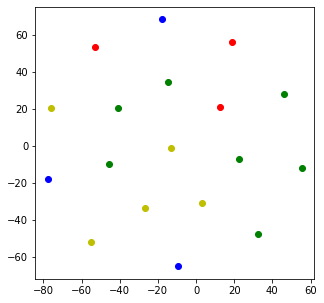

In [15]:
# Plot the t-SNE visualization
plt.figure(figsize=(5,5))
colors = ['r', 'g', 'b', 'y']
for i in range(X_tsne.shape[0]):
    plt.scatter(X_tsne[i, 0], X_tsne[i, 1], c=colors[y_pred_classes[i]], marker='o')
plt.show()

In [7]:
from sklearn.metrics import confusion_matrix, classification_report

In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('data/test', target_size=(224, 224), batch_size=1, class_mode='categorical', shuffle=False)
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

Found 18 images belonging to 4 classes.
18/18 [==============================] - 2s 133ms/step


In [12]:
# Create and display the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

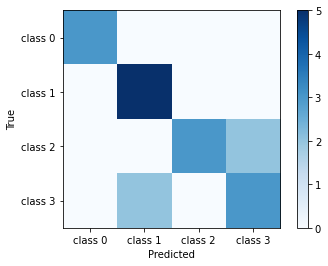

In [13]:
# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks(np.arange(4), ['class 0', 'class 1', 'class 2', 'class 3'])
plt.yticks(np.arange(4), ['class 0', 'class 1', 'class 2', 'class 3'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()